# Anticipez les besoins en consommation électrique de bâtiments

**Problématique de la ville de Seattle**  
Des relevés minutieux ont été effectués par vos agents en 2015 et en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées.

Votre prédiction se basera sur les données déclaratives du permis d'exploitation commerciale (taille et usage des bâtiments, mention de travaux récents, date de construction..)

Vous cherchez également à évaluer l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement par votre équipe.

**Votre mission**  
Vous sortez tout juste d’une réunion de brief avec votre équipe. Voici un récapitulatif de votre mission :

- Réaliser une courte analyse exploratoire.
- Tester différents modèles de prédiction afin de répondre au mieux à la problématique.

L’objectif est de se passer des relevés de consommation annuels (attention à la fuite de données), mais rien n'interdit d’en déduire des variables plus simples (nature et proportions des sources d’énergie utilisées). 

Faire bien attention au traitement des différentes variables, à la fois pour trouver de nouvelles informations (peut-on déduire des choses intéressantes d’une simple adresse ?) et optimiser les performances en appliquant des transformations simples aux variables (normalisation, passage au log, etc.).

Mettre en place une évaluation rigoureuse des performances de la régression, et optimiser les hyperparamètres et le choix d’algorithme de ML à l’aide d’une validation croisée.

**Livrables attendus**  
- Un notebook de l'analyse exploratoire mis au propre et annoté.
- Le code (ou un notebook) des différents tests de modèles mis au propre, dans lequel vous identifierez clairement le modèle final choisi.
- Un support de présentation pour la soutenance.

**Compétences évaluées**  
- Mettre en place le modèle d'apprentissage supervisé adapté au problème métier
- Évaluer les performances d’un modèle d'apprentissage supervisé
- Adapter les hyperparamètres d'un algorithme d'apprentissage supervisé afin de l'améliorer
- Transformer les variables pertinentes d'un modèle d'apprentissage supervisé

# Sommaire

__[I. Chargement et nettoyage des données](#I.-Chargement-et-nettoyage-des-données)__\
[I.1 Descriptions des indicateurs](#I.1-Descriptions-des-indicateurs)\

# I. Chargement et nettoyage des données

## I.1 Descriptions des indicateurs

In [50]:
data2015 = pd.read_csv("./data/2015-building-energy-benchmarking.csv", )
data2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [12]:
indicators = pd.Series(data2015.columns, name="indicators")
indicators

0                                         OSEBuildingID
1                                              DataYear
2                                          BuildingType
3                                   PrimaryPropertyType
4                                          PropertyName
5                         TaxParcelIdentificationNumber
6                                              Location
7                                   CouncilDistrictCode
8                                          Neighborhood
9                                             YearBuilt
10                                    NumberofBuildings
11                                       NumberofFloors
12                                     PropertyGFATotal
13                                   PropertyGFAParking
14                               PropertyGFABuilding(s)
15                            ListOfAllPropertyUseTypes
16                               LargestPropertyUseType
17                            LargestPropertyUse

Regardons si il y a des différences entre 2015 et 2016

In [26]:
data2016 = pd.read_csv("./data/2016-building-energy-benchmarking.csv")
indicators_2016 = pd.Series(data2016.columns, name="indicators_2016")
indicators_2016

0                       OSEBuildingID
1                            DataYear
2                        BuildingType
3                 PrimaryPropertyType
4                        PropertyName
5                             Address
6                                City
7                               State
8                             ZipCode
9       TaxParcelIdentificationNumber
10                CouncilDistrictCode
11                       Neighborhood
12                           Latitude
13                          Longitude
14                          YearBuilt
15                  NumberofBuildings
16                     NumberofFloors
17                   PropertyGFATotal
18                 PropertyGFAParking
19             PropertyGFABuilding(s)
20          ListOfAllPropertyUseTypes
21             LargestPropertyUseType
22          LargestPropertyUseTypeGFA
23       SecondLargestPropertyUseType
24    SecondLargestPropertyUseTypeGFA
25        ThirdLargestPropertyUseType
26     Third

In [28]:
set(indicators_2016.to_numpy()).difference(indicators.to_numpy())

{'Address',
 'City',
 'Comments',
 'GHGEmissionsIntensity',
 'Latitude',
 'Longitude',
 'State',
 'TotalGHGEmissions',
 'ZipCode'}

In [95]:
set(indicators.to_numpy()).difference(set(indicators_2016.to_numpy()))

{'2010 Census Tracts',
 'City Council Districts',
 'Comment',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Location',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes'}

#### Indicateurs 2015-building-energy-benchmarking

name | description 
--- | --- |
OSEBuildingID|A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.
"BuildingType"|"City of Seattle building type classification."
PrimaryPropertyType|The primary use of a property (e.g. office, retail store). Primary use is defined as a function that accounts for more than 50% of a property. This is the Property Type - EPA Calculated field from Portfolio Manager.
PropertyName|Official or common property name.
TaxParcelIdentificationNumber|Property King County PIN
CouncilDistrictCode|Property City of Seattle council district.
YearBuilt|Year in which a property was constructed or underwent a complete renovation.
PropertyGFATotal|Total building and parking gross floor area.
PropertyGFAParking|Total space in square feet of all types of parking (Fully Enclosed, Partially Enclosed, and Open).
PropertyGFABuilding(s)|Total floor space in square feet between the outside surfaces of a building’s enclosing walls. This includes all areas inside the building(s), such as tenant space, common areas, stairwells, basements, storage, etc.
ENERGYSTARScore|An EPA calculated 1-100 rating that assesses a property’s overall energy performance, based on national data to control for differences among climate, building uses, and operations. A score of 50 represents the national median.
SiteEUI(kBtu/sf)|Site Energy Use Intensity (EUI) is a property's Site Energy Use divided by its gross floor area. Site Energy Use is the annual amount of all the energy consumed by the property on-site, as reported on utility bills. Site EUI is measured in thousands of British thermal units (kBtu) per square foot.
SiteEUIWN(kBtu/sf)|Weather Normalized (WN) Site Energy Use Intensity (EUI) is a property's WN Site Energy divided by its gross floor area (in square feet). WN Site Energy is the Site Energy Use the property would have consumed during 30-year average weather conditions. WN Site EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.
SourceEUI(kBtu/sf)|Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area. Source Energy Use is the annual energy used to operate the property, including losses from generation, transmission, & distribution. Source EUI is measured in thousands of British thermal units (kBtu) per square foot.
SourceEUIWN(kBtu/sf)|Weather Normalized (WN) Source Energy Use Intensity (EUI) is a property's WN Source Energy divided by its gross floor area. WN Source Energy is the Source Energy Use the property would have consumed during 30-year average weather conditions. WN Source EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.
SiteEnergyUse(kBtu)|The annual amount of energy consumed by the property from all sources of energy.
SteamUse(kBtu)|The annual amount of district steam consumed by the property on-site, measured in thousands of British thermal units (kBtu).
Electricity(kWh)|The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in kWh.
Electricity(kBtu)|The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in thousands of British thermal units (kBtu).
NaturalGas(therms)|The annual amount of utility-supplied natural gas consumed by the property, measured in therms.
GHGEmissions(MetricTonsCO2e)|The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.
GHGEmissionsIntensity(kgCO2e/ft2)|Total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources



#### Indicateurs 2016-building-energy-benchmarking

name | description 
--- | --- |
TotalGHGEmissions|The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh until the 2016 factor is available. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.
GHGEmissionsIntensity|Total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources

Plusieurs indicateurs différents. Faisons le ménage

In [17]:
data2016.Address

0          405 Olive way
1        724 Pine street
2        1900 5th Avenue
3         620 STEWART ST
4          401 LENORA ST
              ...       
3371    1600 S Dakota St
3372       719 8th Ave S
3373      1920 1st Ave W
3374      8319 8th Ave S
3375    2820 S Myrtle St
Name: Address, Length: 3376, dtype: object

In [19]:
data2015.Location.iloc[0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

Il semblerait que les colonnes Latitude Longitude Address City State ZipCode soient contenues dans Location

In [25]:
data2016[data2016["ZipCode"]==98101]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.529300,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.816410,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.000000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.130860,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
5,9,2016,Nonresidential COS,Other,West Precinct,810 Virginia St,Seattle,WA,98101.0,0660000560,...,2.160444e+06,7371434.0,47151.816410,4715182.0,False,NaN,Compliant,NaN,301.81,3.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,49944,2016,Multifamily MR (5-9),Mixed Use Property,Pine Building,1535 First Avenue,Seattle,WA,98101.0,5160500000,...,7.585148e+05,2588053.0,32386.919920,3238692.0,False,NaN,Compliant,NaN,190.05,2.86
3267,49945,2016,NonResidential,Senior Care Community,Market Garage,1426 WESTERN AVE,Seattle,WA,98101.0,6598350000,...,5.533597e+05,1888063.0,8494.709961,849471.0,False,NaN,Compliant,NaN,58.28,0.30
3292,50000,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Nine and Pine,1601 9th Ave,Seattle,WA,98101.0,0660000860,...,4.463358e+05,1522898.0,32674.244140,3267424.0,False,NaN,Compliant,NaN,184.15,2.47
3302,50014,2016,Multifamily HR (10+),High-Rise Multifamily,Premiere on Pine,1525 9th ave,Seattle,WA,98101.0,0660000915,...,3.004149e+06,10250156.0,103704.351600,10370435.0,False,NaN,Compliant,NaN,622.23,1.25


Dans la table 2015, Zip Codes semble être générées automatiquement - on ne la garde pas dans un premier temps.

On va donc, dans la table 2015: 
- splitter Location en Latitude, Longitude, Address City State ZipCode
- Retirer Zip Codes

Renommer certaines colonnes pour assurer la correspondance avec 2016, de façon à fusionner les tables
- GHGEmissions(MetricTonsCO2e) (2015) et TotalGHGEmissions (2016) sont en fait les mêmes colonnes
- GHGEmissionsIntensity(kgCO2e/ft2) et GHGEmissionsIntensity sont les mêmes colonnes

In [51]:
from ast import literal_eval

data2015["Location"] = data2015.Location.apply(literal_eval)

In [52]:
df = pd.json_normalize(data2015.Location)

In [55]:
df["human_address"] = df.human_address.apply(literal_eval)

In [56]:
df2 = pd.json_normalize(df.human_address)

In [57]:
df2.head()

,address,city,state,zip
0,405 OLIVE WAY,SEATTLE,WA,98101
1,724 PINE ST,SEATTLE,WA,98101
2,1900 5TH AVE,SEATTLE,WA,98101
3,620 STEWART ST,SEATTLE,WA,98101
4,401 LENORA ST,SEATTLE,WA,98121


In [59]:
df3 = pd.concat([df.drop(columns="human_address"), df2], axis=1)
df3.head()

,latitude,longitude,address,city,state,zip
0,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121


In [ ]:
data2015.drop(columns="Location", inplace=True)

In [71]:
for i, col in enumerate(df3.columns):
    data2015.insert(i+5, col, df3[col])

In [72]:
data2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,latitude,longitude,address,city,state,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


On retire Zip Codes

In [73]:
data2015.drop(columns="Zip Codes", inplace=True)

In [74]:
data2015.rename(columns={"GHGEmissions(MetricTonsCO2e)":"TotalGHGEmissions",
                         "GHGEmissionsIntensity(kgCO2e/ft2)":"GHGEmissionsIntensity"
                        }, inplace=True)

In [76]:
data2015.rename(columns={"Comment":"Comments"}, inplace=True)

In [90]:
data2015.rename(columns={"latitude":"Latitude", 
                     "longitude":"Longitude", 
                     "address":"Address", 
                     "city":"City", 
                     "state":"State"}, inplace=True)

In [91]:
data2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Latitude,Longitude,Address,City,State,...,TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,...,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,...,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,...,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0
3,5,2015,NonResidential,Hotel,HOTEL MAX,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,...,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,...,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0


In [103]:
data = pd.concat([data2015, data2016], join="outer")

In [101]:
data2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [104]:
print(data.shape, data2015.shape, data2016.shape)

(6716, 52) (3340, 51) (3376, 46)


In [106]:
data_cols = pd.Series(data.columns, name="data_cols")

In [107]:
data_cols

0                                         OSEBuildingID
1                                              DataYear
2                                          BuildingType
3                                   PrimaryPropertyType
4                                          PropertyName
5                                              Latitude
6                                             Longitude
7                                               Address
8                                                  City
9                                                 State
10                                                  zip
11                        TaxParcelIdentificationNumber
12                                  CouncilDistrictCode
13                                         Neighborhood
14                                            YearBuilt
15                                    NumberofBuildings
16                                       NumberofFloors
17                                     PropertyG

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 3375
Data columns (total 52 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  6716 non-null   int64  
 1   DataYear                                                       6716 non-null   int64  
 2   BuildingType                                                   6716 non-null   object 
 3   PrimaryPropertyType                                            6716 non-null   object 
 4   PropertyName                                                   6716 non-null   object 
 5   Latitude                                                       6716 non-null   object 
 6   Longitude                                                      6716 non-null   object 
 7   Address                                                     

In [109]:
import missingno as msno    

<AxesSubplot:>

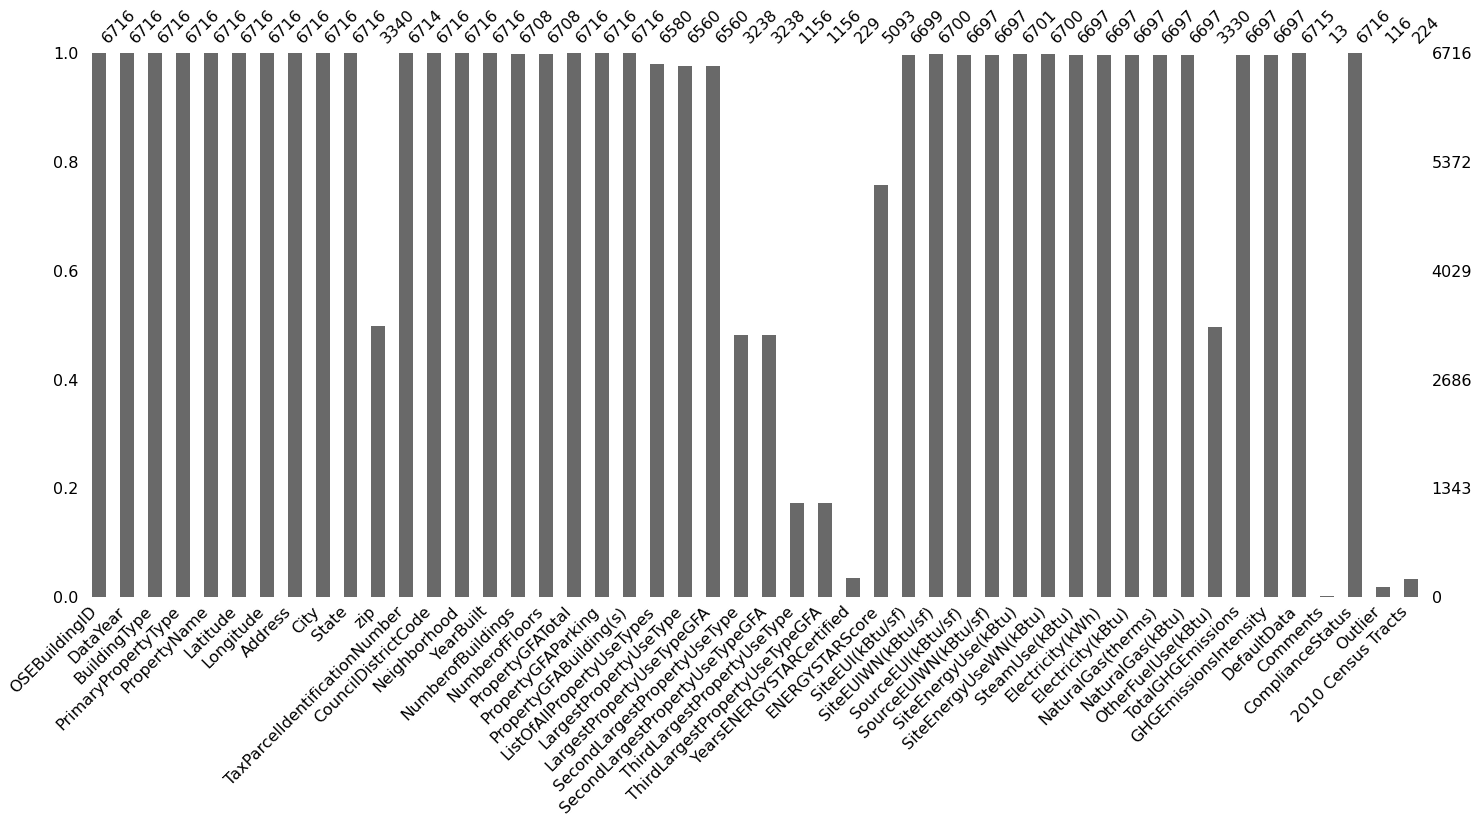

In [116]:
msno.bar(data[data.columns[:-4]])

In [120]:
missing = data.notna().sum()/data.shape[0]

In [123]:
missing[missing<0.5]

zip                                                              0.497320
SecondLargestPropertyUseType                                     0.482132
SecondLargestPropertyUseTypeGFA                                  0.482132
ThirdLargestPropertyUseType                                      0.172126
ThirdLargestPropertyUseTypeGFA                                   0.172126
YearsENERGYSTARCertified                                         0.034098
OtherFuelUse(kBtu)                                               0.495831
Comments                                                         0.001936
Outlier                                                          0.017272
2010 Census Tracts                                               0.033353
Seattle Police Department Micro Community Policing Plan Areas    0.497022
City Council Districts                                           0.031715
SPD Beats                                                        0.497022
dtype: float64

In [125]:
data_nna = data.drop(columns=missing[missing<0.5].index)

<AxesSubplot:>

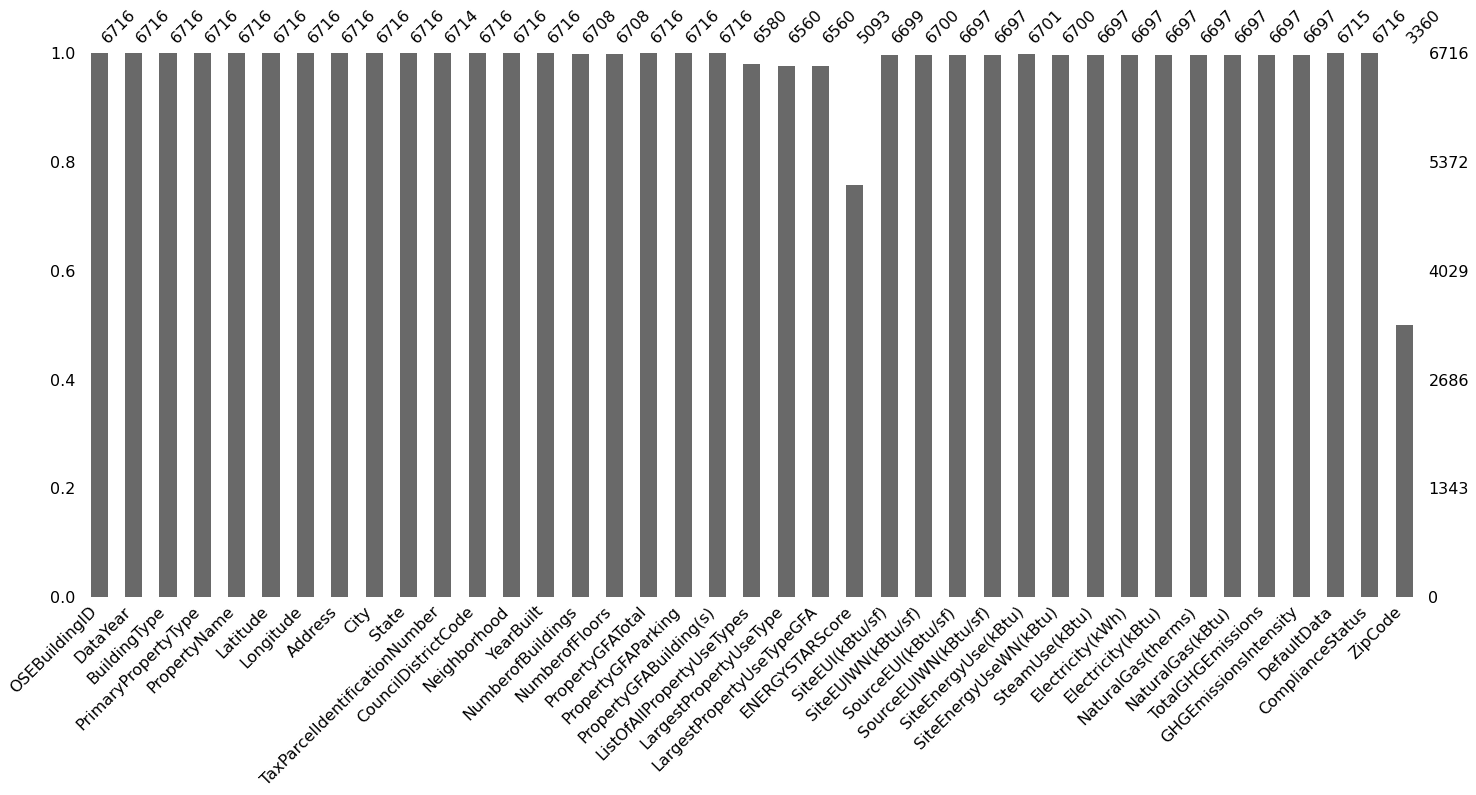

In [127]:
msno.bar(data_nna)

In [128]:
data_nna.to_csv("data_nna.csv", index_label=False)

# II. Analyse exploratoire

In [131]:
import seaborn as sns
data_nna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 3375
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OSEBuildingID                  6716 non-null   int64  
 1   DataYear                       6716 non-null   int64  
 2   BuildingType                   6716 non-null   object 
 3   PrimaryPropertyType            6716 non-null   object 
 4   PropertyName                   6716 non-null   object 
 5   Latitude                       6716 non-null   object 
 6   Longitude                      6716 non-null   object 
 7   Address                        6716 non-null   object 
 8   City                           6716 non-null   object 
 9   State                          6716 non-null   object 
 10  TaxParcelIdentificationNumber  6714 non-null   object 
 11  CouncilDistrictCode            6716 non-null   int64  
 12  Neighborhood                   6716 non-null   o

### On cherche les corrélations

In [ ]:
import matplotlib.pyplot as plt

In [137]:
corr = data_nna.corr()

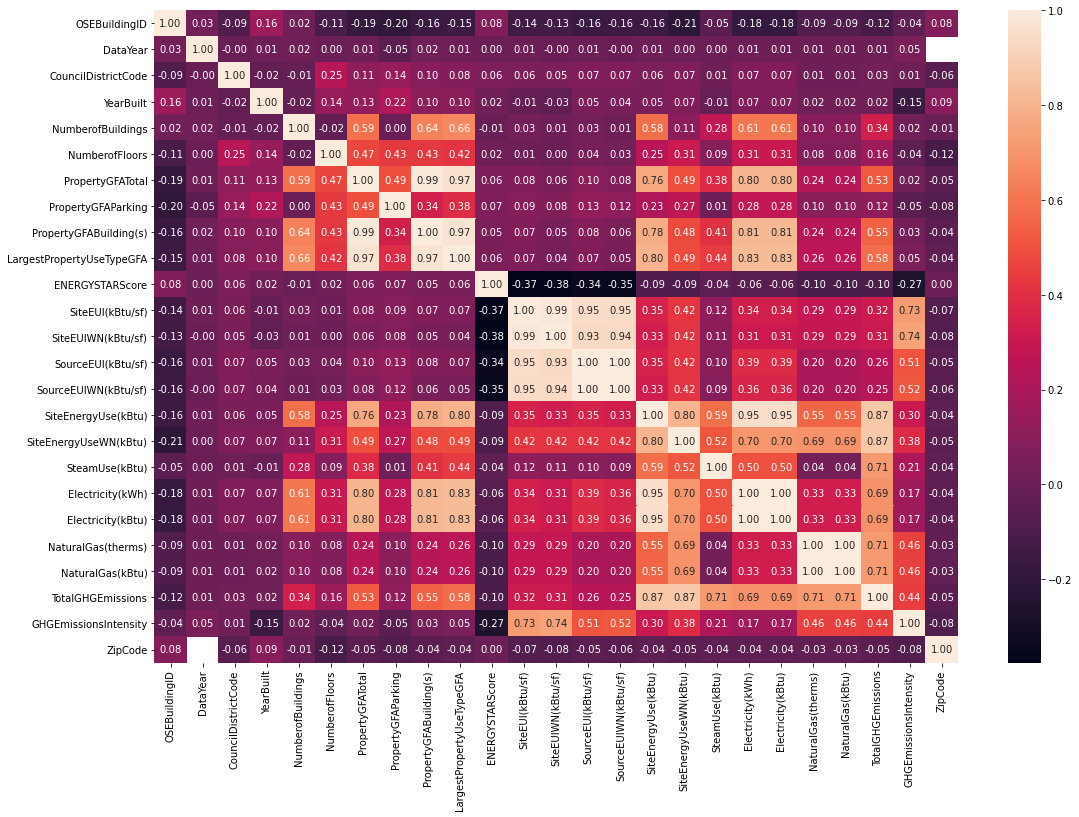

In [145]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

### On sépare le dataframe en deux: les colonnes numériques et les colonnes "object"

In [149]:
predictors = data_nna.drop(columns=["GHGEmissionsIntensity", "TotalGHGEmissions", "ENERGYSTARScore", ]).columns

In [154]:
predictors_obj = predictors[data_nna[predictors].dtypes=="object"]

In [155]:
predictors_obj

Index(['BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Latitude',
       'Longitude', 'Address', 'City', 'State',
       'TaxParcelIdentificationNumber', 'Neighborhood',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'DefaultData',
       'ComplianceStatus'],
      dtype='object')

In [156]:
predictors_numeric = data_nna[predictors].drop(columns=predictors_obj).columns

In [167]:
predictors_numeric

Index(['OSEBuildingID', 'DataYear', 'CouncilDistrictCode', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'ZipCode'],
      dtype='object')

In [165]:
data_numeric = data_nna[predictors_numeric]

In [166]:
data_numeric.LargestPropertyUseTypeGFA

0        88434.0
1        83880.0
2       757243.0
3        61320.0
4       123445.0
          ...   
3371     12294.0
3372     16000.0
3373      7583.0
3374      6601.0
3375      8271.0
Name: LargestPropertyUseTypeGFA, Length: 6716, dtype: float64

On retire les colonnes OSEBuildingID, DataYear, CouncilDistrictCode qui sont des variables catégorielles en réalité

In [168]:
data_numeric.drop(columns=["OSEBuildingID", "DataYear", "CouncilDistrictCode", "YearBuilt"], inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [169]:
data_numeric.columns

Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'ZipCode'],
      dtype='object')

<AxesSubplot:>

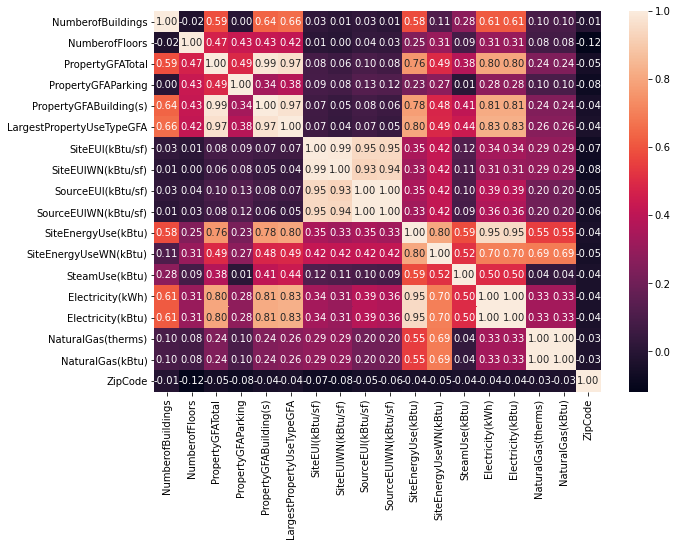

In [173]:
plt.figure(figsize=(10, 7))
sns.heatmap(data_numeric.corr(), annot=True, fmt=".2f")